In [1]:
from NeuralNetwork import Perceptron, ANN, Activation, Loss, train_test_val_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# innitialize the dataset for each gate

X_gate = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_gate = np.array([0, 0, 0, 1])
y_or_gate = np.array([0, 1, 1, 1])
y_xor_gate = np.array([0, 1, 1, 0])

In [3]:
# set up the perceptron

n_epochs = 10
learning_rate = 0.1

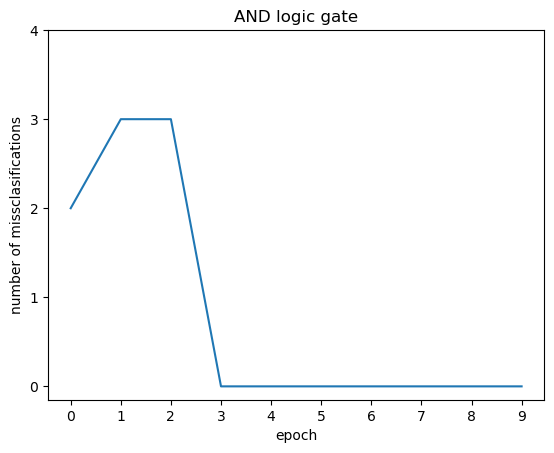

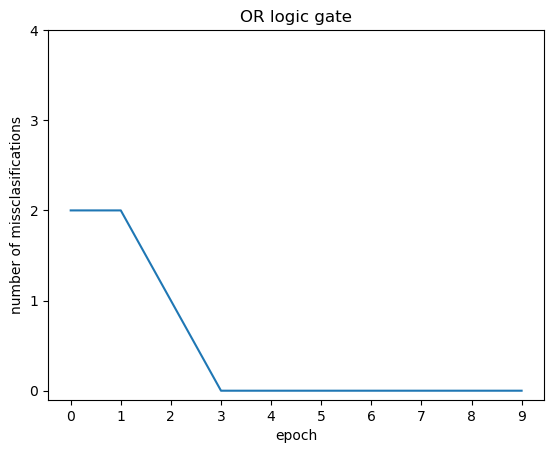

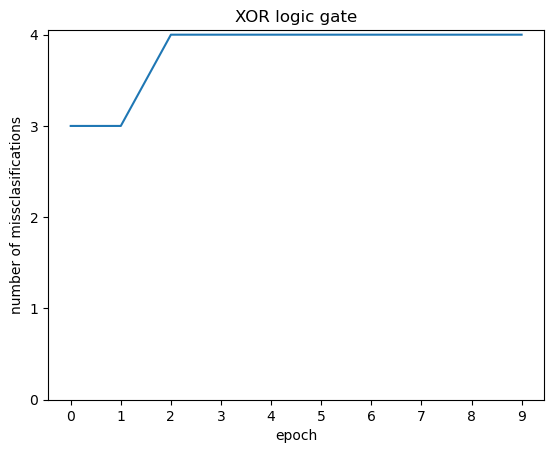

In [4]:
# THIS piece of code shows the error per epoch of the perceptron for each gate

for y_gate, title in zip([y_and_gate, y_or_gate, y_xor_gate], ["AND logic gate", "OR logic gate", "XOR logic gate"]):
    perceptron = Perceptron(learning_rate, n_epochs)
    gate_error = perceptron.train(X_gate, y_gate)
    plt.plot(gate_error)
    plt.xticks(np.arange(0, n_epochs, 1.0))
    plt.yticks(np.arange(0, 5, 1.0))
    plt.ylabel('number of missclasifications')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()

In [5]:
# testing softmax function
assert np.allclose(Activation().softmax(np.array([3.0, 1.0, 0.2])), np.array([0.8360188, 0.11314284, 0.05083836]))

assert np.allclose(Activation().softmax(np.array([[1, 2, 3], 
                                                  [2, 4, 8], 
                                                  [3, 5, 7],
                                                  [6, 6, 6]])), 
                                        np.array([[0.09003057, 0.24472847, 0.66524096],
                                                  [0.00242826, 0.01794253, 0.97962921],
                                                  [0.01587624, 0.11731043, 0.86681333],
                                                  [0.33333333, 0.33333333, 0.33333333]]))

In [6]:
features = pd.read_csv("../data/features.txt", sep = ',', header = None).to_numpy()
targets = pd.read_csv("../data/targets.txt", sep = ',', header = None).to_numpy()

In [7]:
x_train, x_test, x_val, y_train, y_test, y_val = train_test_val_split(features, targets, 0.6, 0.2)

In [8]:
print(features)

[[ 0.57855    0.82114    1.2148    ...  0.92471    0.24418    0.063001 ]
 [-0.022322   0.47681    0.55624   ...  1.0584     0.68453    0.99877  ]
 [ 0.057631   0.0017896  0.95442   ...  0.20707    0.40055    0.2335   ]
 ...
 [ 0.53833    0.16903    0.79056   ...  0.298      0.76012    1.2506   ]
 [ 0.73106    0.48718    0.64578   ...  0.78159    0.78677    0.48252  ]
 [ 1.1326     0.50078    0.93334   ...  0.58395    1.1942     0.61762  ]]


In [9]:
ann = ANN([10, 7], 1.0, [Activation(1.0, 0.1).LReLU, Activation().softmax], Loss().categorical_cross_entropy, number_of_features = 10)
for i in ann.weights:   print(i.shape)
ann.predict(features)

(11, 10)
(11, 7)


array([6, 6, 6, ..., 6, 3, 3], dtype=int64)